# Laboratorio 2 Machine Learning Avanzado - Red Neuronal LSTM

## Integrantes

- Sebastián Gacitúa
- Bastián Guzmán
- Jose Zamora
- Leandro Aroca
- Matthias Clein

## Librerías

In [350]:
import numpy as np
from skimage import io, color
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam

## Imágenes

### Carga y lectura de imágenes

Abrimos una imagen cualquiera indicándole su ruta a la función *imread*. Luego, la mostramos por pantalla con la función *imshow*. Imprimimos también las dimensiones de la imagen.

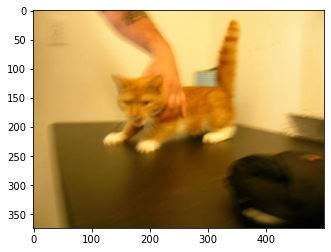

(374, 500, 3)


In [236]:
image = io.imread("../data/dogs-vs-cats/train/cat.0.jpg")
plt.imshow(image)
plt.show()
print(image.shape)

Definimos la función *generate_data* para cargar las imágenes del conjunto de entrenamiento. La función además se encargará de pasar la imagen a escala de grises y reescalar su tamaño a 200x200 pixeles. 

In [237]:
def generate_data(num_images):
    images = []
    labels = []
    for i in range(0, num_images):
        path = "../data/dogs-vs-cats/train/cat.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(0)

    for i in range(0, num_images):
        path = "../data/dogs-vs-cats/train/dog.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(1)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

Llamamos a la función *generate_data* pidiendo X imágenes de perros y gatos.

In [269]:
images, labels = generate_data(12500)

Dividimos el conjunto de imágenes y etiquetas en dos conjuntos: *train* y *test*.

In [270]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)

### Red Neuronal Convolucional (CNN)

#### Modelo 1 - CNN

El primer modelo de Red Neuronal Convolucional se compone de:
- La Capa de entrada es una capa de convolución con 64 filtros de 2x2, padding *same* (rellenar con 0's) y función de activación *relu*.
- Capa de Pooling de un valor máximo con un kernel de 2x2.
- Capa de Dropout de un 30%.
- Capa de convolución con 32 filtros de 2x2, padding *same* (rellenar con 0's) y función de activación *relu*.
- Capa de Pooling de un valor máximo con un kernel de 2x2.
- Capa de Dropout de un 30%.
- Capa Flatten para *"aplanar"* el resultado.
- Capa Densa de 256 neuronas con función de activación *relu*.
- Capa de Dropout de un 50%.
- Capa de salida con una neurona y función de activación *sigmoide*.

In [271]:
cnn_model = tf.keras.Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation = "sigmoid"))

Se imprime el resumen del modelo para conocer su cantidad de parámetros.

In [272]:
cnn_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 200, 200, 64)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 200, 200, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 dropout_56 (Dropout)        (None, 100, 100, 64)      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 100, 100, 32)      8224      
                                                                 
 batch_normalization_5 (Batc  (None, 100, 100, 32)   

Compilamos el modelo con función de pérdida de *Cross-Entropy Binaria* y optimizador *rmsprop*.

In [273]:
cnn_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Se realiza el entrenamiento utilizando el 80% del conjunto *(X_train, y_train)*, pues el restante 20% lo utilizamos como conjunto de validación.

In [283]:
cnn_model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_split = 0.2)

Epoch 1/10
250/250 [==============================] - 554s 2s/step - loss: 0.6199 - accuracy: 0.7317 - val_loss: 0.6089 - val_accuracy: 0.7262
Epoch 2/10
250/250 [==============================] - 529s 2s/step - loss: 0.5176 - accuracy: 0.7644 - val_loss: 0.5692 - val_accuracy: 0.7230
Epoch 3/10
250/250 [==============================] - 529s 2s/step - loss: 0.4615 - accuracy: 0.7893 - val_loss: 0.6638 - val_accuracy: 0.6988
Epoch 4/10
250/250 [==============================] - 531s 2s/step - loss: 0.4206 - accuracy: 0.8083 - val_loss: 0.6306 - val_accuracy: 0.7143
Epoch 5/10
250/250 [==============================] - 544s 2s/step - loss: 0.3816 - accuracy: 0.8290 - val_loss: 0.6099 - val_accuracy: 0.7230
Epoch 6/10
250/250 [==============================] - 534s 2s/step - loss: 0.3477 - accuracy: 0.8465 - val_loss: 0.6307 - val_accuracy: 0.7400
Epoch 7/10
250/250 [==============================] - 527s 2s/step - loss: 0.3228 - accuracy: 0.8574 - val_loss: 0.6957 - val_accuracy: 0.7372

Evaluamos el modelo pasándole el conjunto *(X_test, y_test)*.

In [286]:
cnn_model.evaluate(X_test, y_test)

157/157 [==============================] - 44s 282ms/step - loss: 0.7402 - accuracy: 0.7422


[0.7401975393295288, 0.7422000169754028]

#### Modelo 2 - CNN

El Modelo 2 se compone de:
- Capa de entrada con 32 neuronas y activación *relu*.
- Capa de Dropout de un 30%.
- Capa oculta de 64 neuronas y activación *relu*.
- Capa de Dropout de un 30%.
- Capa oculta de 128 neuronas y activación *relu*.
- Capa de Dropout de un 30%.
- Capa oculta de 128 neuronas y activación *relu*.
- Capa de Dropout de un 30%.    
- Capa oculta de 32 neuronas y activación *relu*.
- Capa de salida con 1 neurona y activación *softmax*.
- Función de pérdida: Binary Cross-Entropy.
- Optimizador *rmsprop*

In [337]:
cnn_model_2 = tf.keras.Sequential()
cnn_model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(512, activation = "relu"))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Dense(1, activation = "softmax"))

Se imprime el resumen del modelo para conocer su cantidad de parámetros.

In [338]:
cnn_model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 200, 200, 32)      160       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_59 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_44 (Conv2D)          (None, 100, 100, 64)      8256      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_60 (Dropout)        (None, 50, 50, 64)      

Compilamos el modelo con función de pérdida de *Cross-Entropy Binaria* y optimizador *rmsprop*.

In [339]:
cnn_model_2.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Se realiza el entrenamiento utilizando el 80% del conjunto *(X_train, y_train)*, pues el restante 20% lo utilizamos como conjunto de validación.

In [340]:
cnn_model_2.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
800/800 [==============================] - 423s 526ms/step - loss: 0.6935 - accuracy: 0.5011 - val_loss: 0.6500 - val_accuracy: 0.4947
Epoch 2/2
800/800 [==============================] - 392s 489ms/step - loss: 0.5986 - accuracy: 0.5011 - val_loss: 0.5372 - val_accuracy: 0.4947


Evaluamos el modelo pasándole el conjunto *(X_test, y_test)*.

In [341]:
cnn_model_2.evaluate(X_test, y_test)

157/157 [==============================] - 26s 160ms/step - loss: 0.5562 - accuracy: 0.5008


[0.5562096238136292, 0.5008000135421753]

### Red Neuronal LSTM (Long Short-Term Memory)

#### Modelo 1 - LSTM

El primer modelo de Red Neuronal LSTM se compone de:
- La Capa de entrada es una capa LSTM de 64 neuronas.
- Capa de salida con una neurona y función de activación *sigmoide*.

In [276]:
lstm_model = tf.keras.Sequential()
lstm_model.add(LSTM(64, input_shape = (200, 200)))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(64, activation = "relu"))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation = "sigmoid"))

Se imprime el resumen del modelo para conocer su cantidad de parámetros.

In [277]:
lstm_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                67840     
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 1)               

Compilamos el modelo con función de pérdida de *Cross-Entropy Binaria* y optimizador *rmsprop*.

In [278]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Se realiza el entrenamiento utilizando el 80% del conjunto *(X_train, y_train)*, pues el restante 20% lo utilizamos como conjunto de validación.

In [281]:
lstm_model.fit(X_train, y_train, batch_size = 16, epochs = 10, validation_split = 0.2)

Epoch 1/10
1000/1000 [==============================] - 48s 48ms/step - loss: 0.6821 - accuracy: 0.5656 - val_loss: 0.6798 - val_accuracy: 0.5810
Epoch 2/10
1000/1000 [==============================] - 43s 43ms/step - loss: 0.6765 - accuracy: 0.5811 - val_loss: 0.6799 - val_accuracy: 0.5788
Epoch 3/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.6672 - accuracy: 0.5991 - val_loss: 0.6813 - val_accuracy: 0.5928
Epoch 4/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.6617 - accuracy: 0.6062 - val_loss: 0.6721 - val_accuracy: 0.6010
Epoch 5/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.6590 - accuracy: 0.6098 - val_loss: 0.6834 - val_accuracy: 0.5785
Epoch 6/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.6564 - accuracy: 0.6136 - val_loss: 0.6567 - val_accuracy: 0.6043
Epoch 7/10
1000/1000 [==============================] - 41s 41ms/step - loss: 0.6550 - accuracy: 0.6095 - val_loss: 0.7224 -

Evaluamos el modelo pasándole el conjunto *(X_test, y_test)*.

In [285]:
lstm_model.evaluate(X_test, y_test)

157/157 [==============================] - 5s 31ms/step - loss: 0.6605 - accuracy: 0.6256


[0.6604712605476379, 0.6255999803543091]

#### Modelo 2 - LSTM

El segundo modelo de Red Neuronal LSTM se compone de:
- La Capa de entrada es una capa LSTM de 64 neuronas.
- Capa densa de 128 neuronas y función de activación *relu*.
- Capa de salida con una neurona y función de activación *sigmoide*.

In [352]:
lstm_model_2 = tf.keras.Sequential()
lstm_model_2.add(LSTM(64, input_shape = (200, 200)))
lstm_model_2.add(Dense(128, activation='relu'))
lstm_model_2.add(Dense(1, activation='sigmoid'))

Se imprime el resumen del modelo para conocer su cantidad de parámetros.

In [353]:
lstm_model_2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                67840     
                                                                 
 dense_49 (Dense)            (None, 128)               8320      
                                                                 
 dense_50 (Dense)            (None, 1)                 129       
                                                                 
Total params: 76,289
Trainable params: 76,289
Non-trainable params: 0
_________________________________________________________________


Compilamos el modelo con función de pérdida de *Cross-Entropy Binaria* y optimizador *Adam*.

In [354]:
lstm_model_2.compile(optimizer = Adam(),  loss = 'binary_crossentropy',   metrics = 'accuracy')

Evaluamos el modelo pasándole el conjunto *(X_test, y_test)*.

In [ ]:
lstm_model.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

### Predicciones

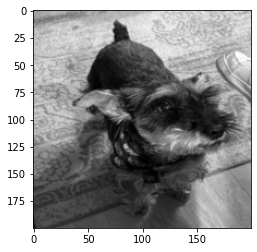

In [346]:
test_image = io.imread("../data/test/flopy.jpg")
# test_image = io.imread("../data/test/gato.jpg")
test_image = color.rgb2gray(test_image)
test_image = resize(test_image, (200, 200), anti_aliasing = True)
plt.imshow(test_image, cmap = "gray")
plt.show()
test_image = np.array([test_image])

In [376]:
print("Modelo CNN 1:", "Perro" if int(round(cnn_model.predict(test_image, verbose = False)[0][0],0)) == 1 else "Gato")
print("Modelo CNN 2:", "Perro" if int(round(cnn_model_2.predict(test_image, verbose = False)[0][0],0)) == 1 else "Gato")
print("Modelo LSTM 1:", "Perro" if int(round(lstm_model.predict(test_image, verbose = False)[0][0],0)) == 1 else "Gato")
print("Modelo LSTM 2:", "Perro" if int(round(lstm_model_2.predict(test_image, verbose = False)[0][0],0)) == 1 else "Gato")

Modelo CNN 1: Perro
Modelo CNN 2: Perro
Modelo LSTM 1: Perro
Modelo LSTM 2: Gato


## Audio